<h1 align="center" style="color: #EF5B0C;">CAR PRICE PREDICTION</h1>

<h2 align='left' style="color: #8758FF;">DATA IMPORT</h2> <br>

<h4>STEPS</h4>

<ol>
    <li>Importing libraries</li>
    <li>Load data</li>
    <li>Finding basic information of data</li>
    <li>Finding Null Values</li>
</ol>

In [1]:
# importing libraries

import numpy as np                           # for array operations
import pandas as pd                          # for data analysis and data cleaning
import matplotlib.pyplot as plt              # for analysis of data using graph plots
import seaborn as sns                        # for analysis of data using graph plots

In [2]:
# loading data into environment

data = pd.read_csv("train-data.csv")

In [3]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.info()                                 # Basic information about the given dataset or dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
# deleting that unwanted cloumn from dataframe [Unnamed: 0] 

data.drop("Unnamed: 0",axis = 1,inplace=True)

In [6]:
data.dtypes                                # Finding datatype of each column in the dataframe 

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [7]:
data.isnull().sum()                       # Finding null values in the dataframe

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

<h2 align='left' style="color: #8758FF;">DATA CLEANING</h2> <br>

<p>Here,the given dataset contains many categorical values namely <b><em>Fuel_Type</em></b>, <b><em>Transmission</em></b>, <b><em>Owner_Type</em></b>, <b><em>Mileage</em></b>, <b><em>Engine</em></b>, <b><em>Power</em></b> which are requried but cannot be given directly to ML model. So, these values should be converted to numeical entites to feed these features to ML model.  </p>

<h4>STEPS</h4>
<ol>
  <li>
    Dealing with  <b><em>Fuel_Type</em></b>
    <ol >
      <li>Dropping records that have less impact</li>
      <li>One hot endcoding of fule types</li>
    </ol>
  </li>
   <br> 
  <li>
    Dealing with  <b><em>Transmission</em></b>
    <ol >
      <li>One hot endcoding of Transmission</li>
    </ol>
  </li>
 <br> 
  <li>
    Dealing with  <b><em>Owner_Type</em></b>
    <ol >
      <li>Integer endcoding of fule types</li>
    </ol>
  </li>
 <br>    
   <li>
    Dealing with  <b><em>Mileage,Engine,Power </em></b>
    <ol >
      <li>Converting categorical to float and int datatypes</li>
    </ol>
  </li>
  
</ol>


### 1. Dealing with Fuel_Type

###### Step : A

In [8]:
# Finding count of categotical values

data["Fuel_Type"].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [9]:
# Dropping the records of cars with fule types as CNG,LPG,Elecrtic as the are very-
# less and may give problem as outliers for data

drop_ele = data[data["Fuel_Type"]=="Electric"].index          # gives index of all records with fule types as electric.           

drop_cng = data[ data['Fuel_Type'] == 'CNG' ].index           # gives index of all records with fule types as CNG.

drop_lpg = data[ data['Fuel_Type'] == 'LPG' ].index           # gives index of all records with fule types as LPG.

index_of_all_drops = []                                       # Empty list for storing indexes.
index_of_all_drops.extend(drop_ele)
index_of_all_drops.extend(drop_cng)                           # Using extend method to inset indexes into list.
index_of_all_drops.extend(drop_lpg)

data.drop(labels=index_of_all_drops,axis=0,inplace=True)      # Dropping records.

# drop_ele = data[data["Fuel_Type"]=="Electric"].index
# drop_ele
# output : Int64Index([4446, 4904], dtype='int64')


In [10]:
data["Fuel_Type"].value_counts()                             # Conformation of dropping

Diesel    3205
Petrol    2746
Name: Fuel_Type, dtype: int64

In [11]:
data.reset_index(inplace=True)                               # reseting index as records are dropped.

###### Step : B

In [12]:
encoder = pd.get_dummies(data["Fuel_Type"])                 # One hot endcoding of fule types using get_dummies() method
encoder.head()                                              # If the fuel type is Diesel then Diesel column is marked as 1 and petrol as 0 and viceversa

,Diesel,Petrol
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [13]:
data_encoded = pd.concat([data,encoder],axis=1)           # New dataframe data_encoded by concating orginal dataframe and fule type encoders
data_encoded.head()

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Diesel,Petrol
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1,0
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1,0
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,1,0


In [14]:
data_encoded.drop(["index","Fuel_Type"],axis=1,inplace=True)

In [15]:
data_encoded

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Diesel,Petrol
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1,0
1,Honda Jazz V,Chennai,2011,46000,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1
2,Maruti Ertiga VDI,Chennai,2012,87000,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1,0
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5946,Maruti Swift VDI,Delhi,2014,27365,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,1,0
5947,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,1,0
5948,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,1,0
5949,Maruti Wagon R VXI,Kolkata,2013,46000,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,0,1


### 2. Dealing with Transmission

##### Step : A

In [16]:
data["Transmission"].value_counts()                       # Finding count of categotical values                 

Manual       4233
Automatic    1718
Name: Transmission, dtype: int64

In [17]:
tras_encoders = pd.get_dummies(data["Transmission"])     # One hot encoding

In [18]:
tras_encoders.head()

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [19]:
fuel_tran_encoded_data = pd.concat([data_encoded,tras_encoders],axis=1)   # New dataframe where fuel and transmission are encoded
fuel_tran_encoded_data

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Diesel,Petrol,Automatic,Manual
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1,0,0,1
1,Honda Jazz V,Chennai,2011,46000,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,0,1
2,Maruti Ertiga VDI,Chennai,2012,87000,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1,0,0,1
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,1,0
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5946,Maruti Swift VDI,Delhi,2014,27365,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,1,0,0,1
5947,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,1,0,0,1
5948,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,1,0,0,1
5949,Maruti Wagon R VXI,Kolkata,2013,46000,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,0,1,0,1


In [20]:
fuel_tran_encoded_data.drop("Transmission",axis=1,inplace=True)
fuel_tran_encoded_data.head(20)

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Diesel,Petrol,Automatic,Manual
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1,0,0,1
1,Honda Jazz V,Chennai,2011,46000,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,0,1
2,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1,0,0,1
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,1,0
4,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,1,0,0,1
5,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,1,0,1,0
6,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,1,0,0,1
7,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,1,0,0,1
8,Maruti Ciaz Zeta,Kochi,2018,25692,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95,0,1,0,1
9,Honda City 1.5 V AT Sunroof,Kolkata,2012,60000,First,16.8 kmpl,1497 CC,116.3 bhp,5.0,NaN,4.49,0,1,1,0


### 3. Dealing with Owner_Type

##### Step : A

In [21]:
data["Owner_Type"].value_counts()

First             4874
Second             956
Third              112
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [22]:
# interger encoding

fuel_tran_encoded_data.replace({"Owner_Type":{"First":1,"Second":2,"Third":3,"Fourth & Above":4}},inplace=True)

In [23]:
fuel_tran_encoded_data.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Diesel,Petrol,Automatic,Manual
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1,0,0,1
1,Honda Jazz V,Chennai,2011,46000,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0,1,0,1
2,Maruti Ertiga VDI,Chennai,2012,87000,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1,0,0,1
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1,0,1,0
4,Nissan Micra Diesel XV,Jaipur,2013,86999,1,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,1,0,0,1


In [24]:
fuel_tran_encoded_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Owner_Type             int64
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
Diesel                 uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
dtype: object

### 4.Dealing with  Mileage,Engine,Power

##### Step 1 - Dealing with Mileage

In [25]:
milage = fuel_tran_encoded_data

milage["Mileage"].convert_dtypes()                             # converts from categorical value to string value

milage_in_numbers = pd.DataFrame(columns =["Mileage"])         # empty dataframe with single column as Mileage

for x in range(fuel_tran_encoded_data.index.max()+1):          # for loop to append values into above empty dataframe
    new1 = milage["Mileage"][x]
    li1  = new1.split(" ")
    milage_in_numbers.loc[x] = li1[0]
    
milage_in_numbers.convert_dtypes()                            # converts from categorical value to string value

series = milage_in_numbers["Mileage"].astype(float)           # Getting mileage numbers in the form of series and converting to float values

mil_num = pd.DataFrame(series)                                # Converting into dataframe
mil_num

,Mileage
0,19.67
1,18.20
2,20.77
3,15.20
4,23.08
...,...
5946,28.40
5947,24.40
5948,14.00
5949,18.90


In [26]:
mil_num.dtypes

Mileage    float64
dtype: object

##### Step 2 - Dealing with Power

In [27]:
Power = fuel_tran_encoded_data

Power["Power"].convert_dtypes()                                 # converts from categorical value to string value

Power["Power"].fillna('0.0',inplace=True)                       # filling null values with '0.0' as string value


Power_in_numbers = pd.DataFrame(columns =["Power"])             # empty dataframe with single column as Power

n = fuel_tran_encoded_data.index.max()+1                        # Getting max index of dataframe

for y in range(n):                                              # for loop to append values into above empty dataframe
    new2 = str(Power["Power"][y])
    li2 = new2.split(' ')
    Power_in_numbers.loc[y] = li2[0]
    
Power_in_numbers.convert_dtypes()                               # converts from categorical value to string value


Power_in_numbers.replace('null', 0, inplace=True)              # Since '0.0' becomes null values after conversion, replacing them with integer 0
Power_in_numbers.convert_dtypes()
series1 = Power_in_numbers["Power"].astype(float)


power_num = pd.DataFrame(series1)
power_num.dtypes

Power    float64
dtype: object

In [28]:
power_num

,Power
0,126.20
1,88.70
2,88.76
3,140.80
4,63.10
...,...
5946,74.00
5947,71.00
5948,112.00
5949,67.10


##### Step 3 - Dealing Engine

In [29]:
Engine = fuel_tran_encoded_data

Engine["Engine"].convert_dtypes()

Engine["Engine"].fillna('0.0',inplace=True)


Engine_in_numbers = pd.DataFrame(columns =["Engine"])

n = fuel_tran_encoded_data.index.max()+1

for z in range(n):
    new3 = str(Engine["Engine"][z])
    li3 = new3.split(' ')
    
    Engine_in_numbers.loc[z] = li3[0]
    
Engine_in_numbers.convert_dtypes()

Engine_in_numbers.replace('null', 0, inplace=True)
Engine_in_numbers.convert_dtypes()
series2 = Engine_in_numbers["Engine"].astype(float)

eng_num = pd.DataFrame(series2)
eng_num.dtypes

Engine    float64
dtype: object

In [30]:
eng_num

,Engine
0,1582.0
1,1199.0
2,1248.0
3,1968.0
4,1461.0
...,...
5946,1248.0
5947,1120.0
5948,2498.0
5949,998.0


<h2 align='left' style="color: #8758FF;">FINAL DATAFRAME</h2> <br>

In [31]:
transform1_data = fuel_tran_encoded_data

In [32]:
transform1_data.drop(["Mileage","Engine","Power","New_Price"],axis=1,inplace=True)
transform1_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Owner_Type             int64
Seats                float64
Price                float64
Diesel                 uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
dtype: object

In [33]:
data2 = pd.concat([transform1_data,mil_num,power_num,eng_num],axis=1)                                    # adding milage,power,engine to new dataframe data2
data2.rename(columns={"Mileage":"Mileage-km/li","Power":"Power-bhp","Engine":"Engine-CC"},inplace=True)

In [34]:
column_to_move = data2.pop("Price")
data2.insert(13, "Price", column_to_move)

In [35]:
data2.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Seats,Diesel,Petrol,Automatic,Manual,Mileage-km/li,Power-bhp,Engine-CC,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,5.0,1,0,0,1,19.67,126.20,1582.0,12.50
1,Honda Jazz V,Chennai,2011,46000,1,5.0,0,1,0,1,18.20,88.70,1199.0,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,1,7.0,1,0,0,1,20.77,88.76,1248.0,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,5.0,1,0,1,0,15.20,140.80,1968.0,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,1,5.0,1,0,0,1,23.08,63.10,1461.0,3.50


In [36]:
data2.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Owner_Type            0
Seats                42
Diesel                0
Petrol                0
Automatic             0
Manual                0
Mileage-km/li         0
Power-bhp             0
Engine-CC             0
Price                 0
dtype: int64

In [37]:
m=data2["Seats"].mean()
int(m)

5

In [38]:
data2["Seats"].fillna(m,inplace=True)

In [39]:
data2.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Owner_Type           0
Seats                0
Diesel               0
Petrol               0
Automatic            0
Manual               0
Mileage-km/li        0
Power-bhp            0
Engine-CC            0
Price                0
dtype: int64

In [40]:
data2.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Owner_Type             int64
Seats                float64
Diesel                 uint8
Petrol                 uint8
Automatic              uint8
Manual                 uint8
Mileage-km/li        float64
Power-bhp            float64
Engine-CC            float64
Price                float64
dtype: object

### Final DataFrame is data2

In [41]:
data2.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Seats,Diesel,Petrol,Automatic,Manual,Mileage-km/li,Power-bhp,Engine-CC,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,5.0,1,0,0,1,19.67,126.20,1582.0,12.50
1,Honda Jazz V,Chennai,2011,46000,1,5.0,0,1,0,1,18.20,88.70,1199.0,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,1,7.0,1,0,0,1,20.77,88.76,1248.0,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,5.0,1,0,1,0,15.20,140.80,1968.0,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,1,5.0,1,0,0,1,23.08,63.10,1461.0,3.50


In [42]:
data2.tail()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Seats,Diesel,Petrol,Automatic,Manual,Mileage-km/li,Power-bhp,Engine-CC,Price
5946,Maruti Swift VDI,Delhi,2014,27365,1,5.0,1,0,0,1,28.40,74.0,1248.0,4.75
5947,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,1,5.0,1,0,0,1,24.40,71.0,1120.0,4.00
5948,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2,8.0,1,0,0,1,14.00,112.0,2498.0,2.90
5949,Maruti Wagon R VXI,Kolkata,2013,46000,1,5.0,0,1,0,1,18.90,67.1,998.0,2.65
5950,Chevrolet Beat Diesel,Hyderabad,2011,47000,1,5.0,1,0,0,1,25.44,57.6,936.0,2.50


<h2 align='left' style="color: #8758FF;">EXPLORATORY DATA ANALYSIS [EDA]</h2> <br>

<h4>STEPS</h4>
<ol>
  <li>
      <b><em>Descriptive Statistics</em></b>
  </li>
   <br> 
  <li>
     <b><em>Group by</em></b>
  </li>
 <br> 
  <li>
    <b><em>co-relation</em></b>
  </li>
 <br>    
   <li>
    <b><em>Co-relation Statistics</em></b>
  </li>
  
</ol>


#### Step 1 : Descriptive Statistics

In [43]:
data2.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Owner_Type,Seats,Diesel,Petrol,Automatic,Manual,Mileage-km/li,Power-bhp,Engine-CC,Price
count,5951,5951,5951.000000,5.951000e+03,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000,5951.000000
unique,1847,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,49,771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.356411,5.877124e+04,1.202823,5.281604,0.538565,0.461435,0.288691,0.711309,18.064325,111.106717,1617.686775,9.546187
std,NaN,NaN,3.275297,9.175899e+04,0.456548,0.807882,0.498552,0.498552,0.453192,0.453192,4.511393,56.010272,612.661671,11.231884
min,NaN,NaN,1998.000000,1.710000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000
25%,NaN,NaN,2011.000000,3.396550e+04,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,15.100000,74.000000,1198.000000,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,1.000000,5.000000,1.000000,0.000000,0.000000,1.000000,18.120000,93.700000,1493.000000,5.690000
75%,NaN,NaN,2016.000000,7.300000e+04,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,21.025000,138.100000,1984.000000,10.000000


<AxesSubplot:xlabel='Year', ylabel='Engine-CC'>

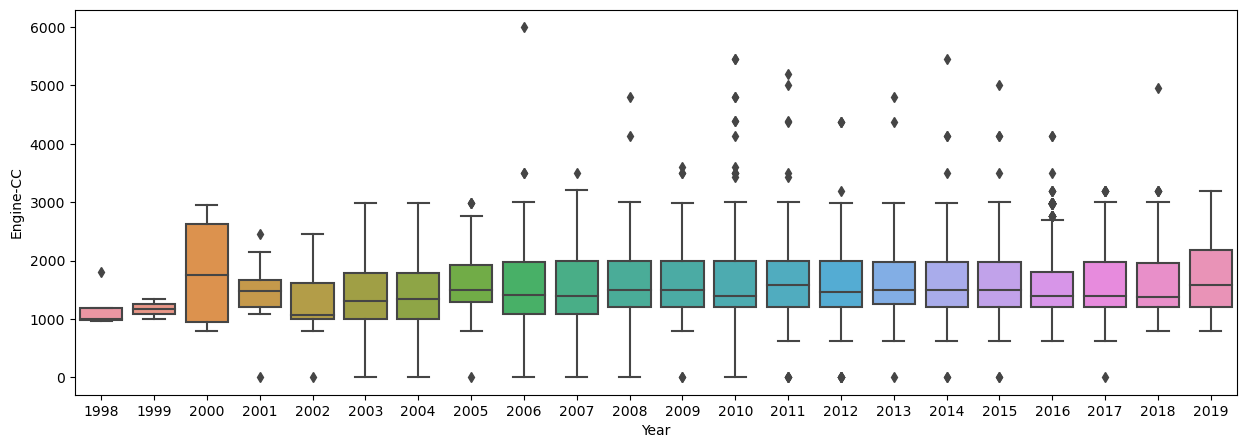

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Year',y='Engine-CC',data=data2)

<AxesSubplot:xlabel='Year', ylabel='Power-bhp'>

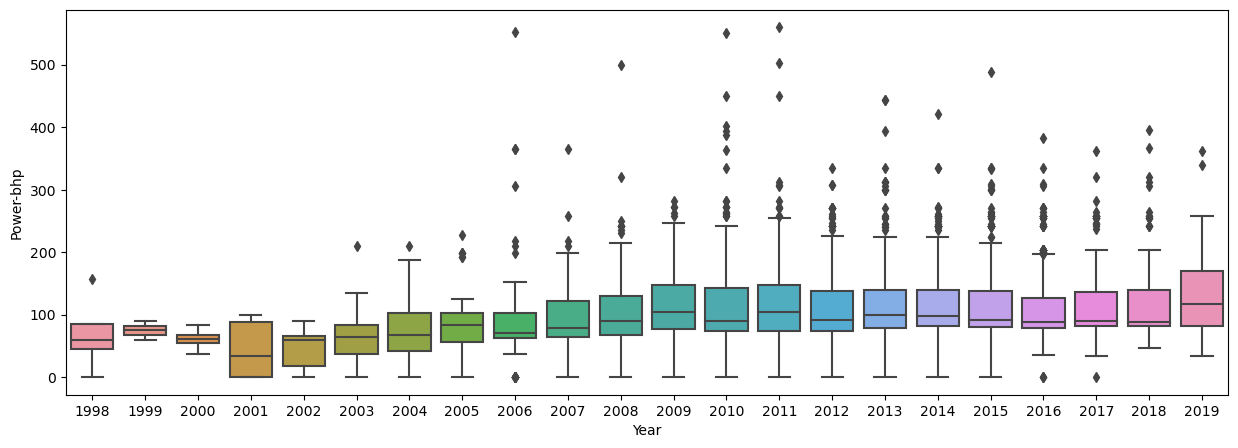

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Year',y='Power-bhp',data=data2)

<AxesSubplot:xlabel='Year', ylabel='Mileage-km/li'>

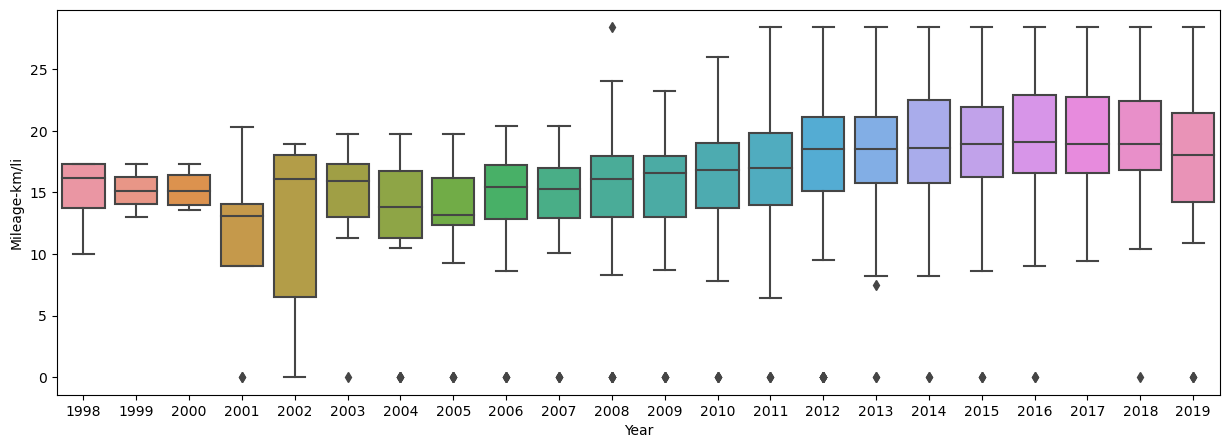

In [46]:

plt.figure(figsize=(15,5))
sns.boxplot(x='Year',y='Mileage-km/li',data=data2)

<AxesSubplot:xlabel='Year', ylabel='Price'>

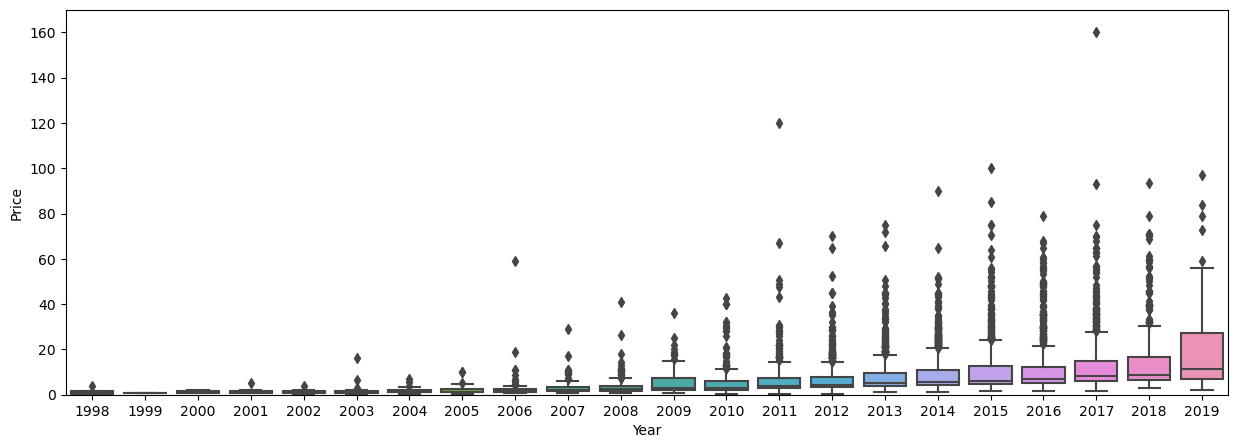

In [47]:
plt.figure(figsize=(15,5))
plt.ylim(0,170,10)
sns.boxplot(x='Year',y='Price',data=data2)

<AxesSubplot:xlabel='Year', ylabel='Owner_Type'>

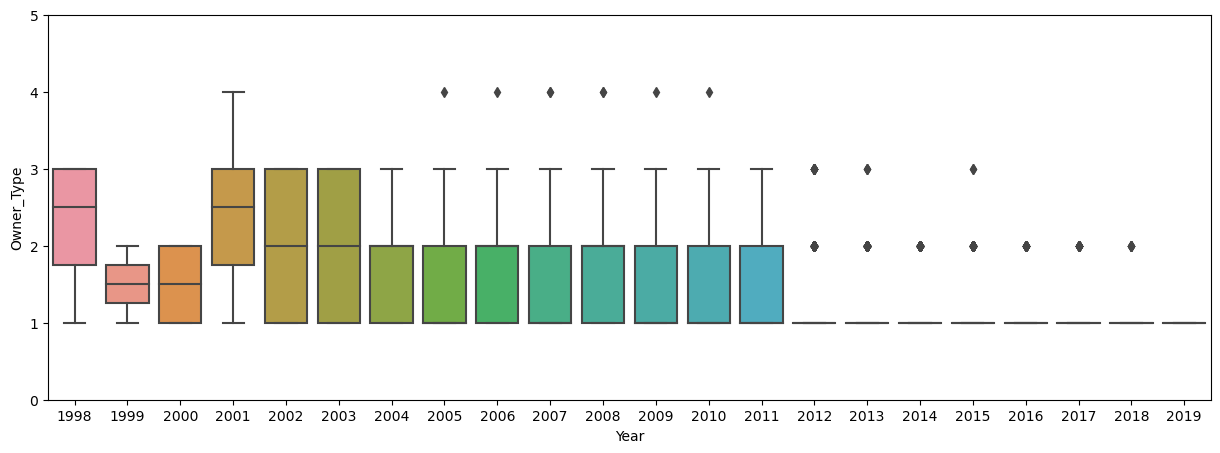

In [48]:
plt.figure(figsize=(15,5))
plt.ylim(0,5)
sns.boxplot(x='Year',y='Owner_Type',data=data2)

Text(0, 0.5, 'price')

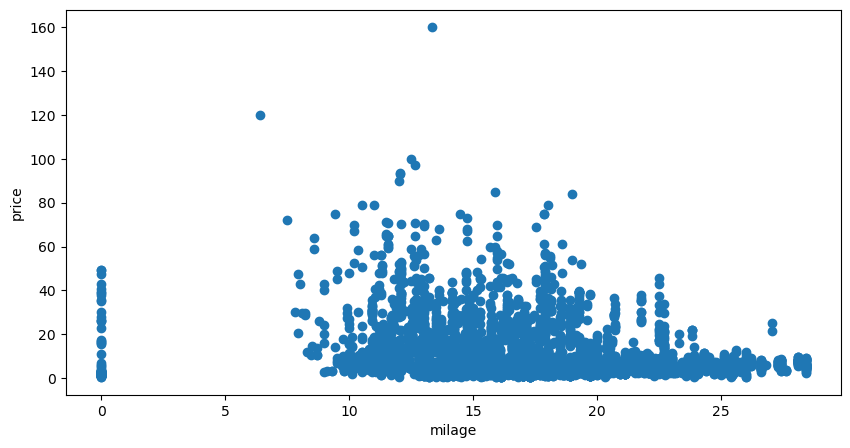

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(x='Mileage-km/li',y='Price',data=data2)
plt.xlabel("milage")
plt.ylabel("price")

Text(0, 0.5, 'price')

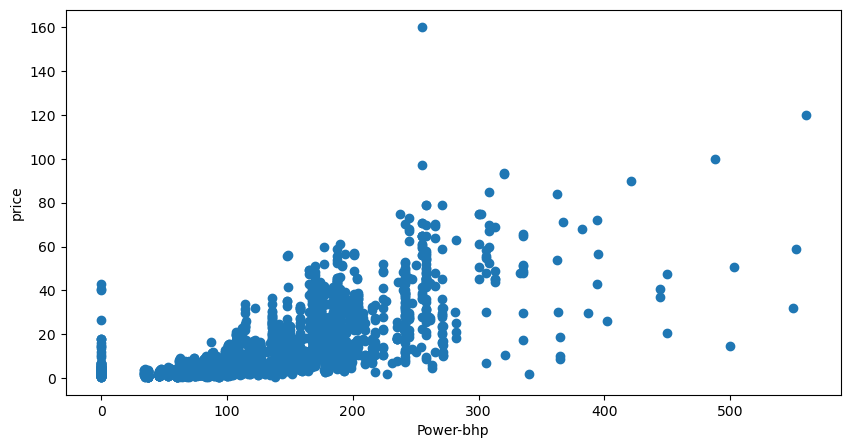

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(x='Power-bhp',y='Price',data=data2)
plt.xlabel("Power-bhp")
plt.ylabel("price")

Text(0, 0.5, 'price')

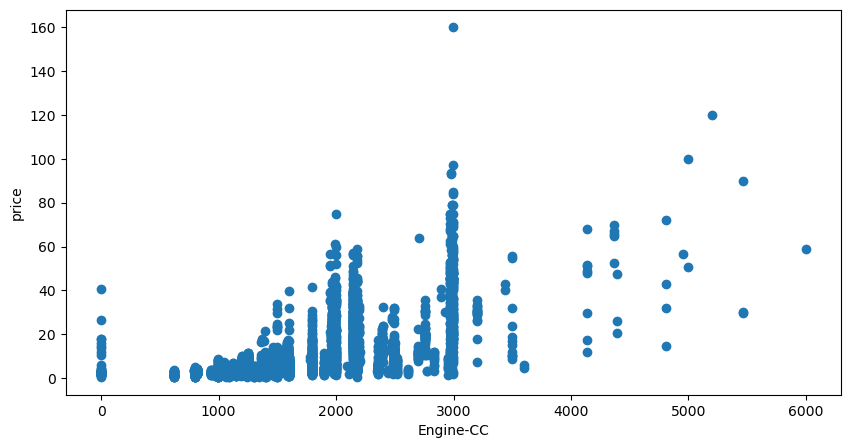

In [51]:
plt.figure(figsize=(10,5))
plt.scatter(x='Engine-CC',y='Price',data=data2)
plt.xlabel("Engine-CC")
plt.ylabel("price")

(160.0, 650000.0)

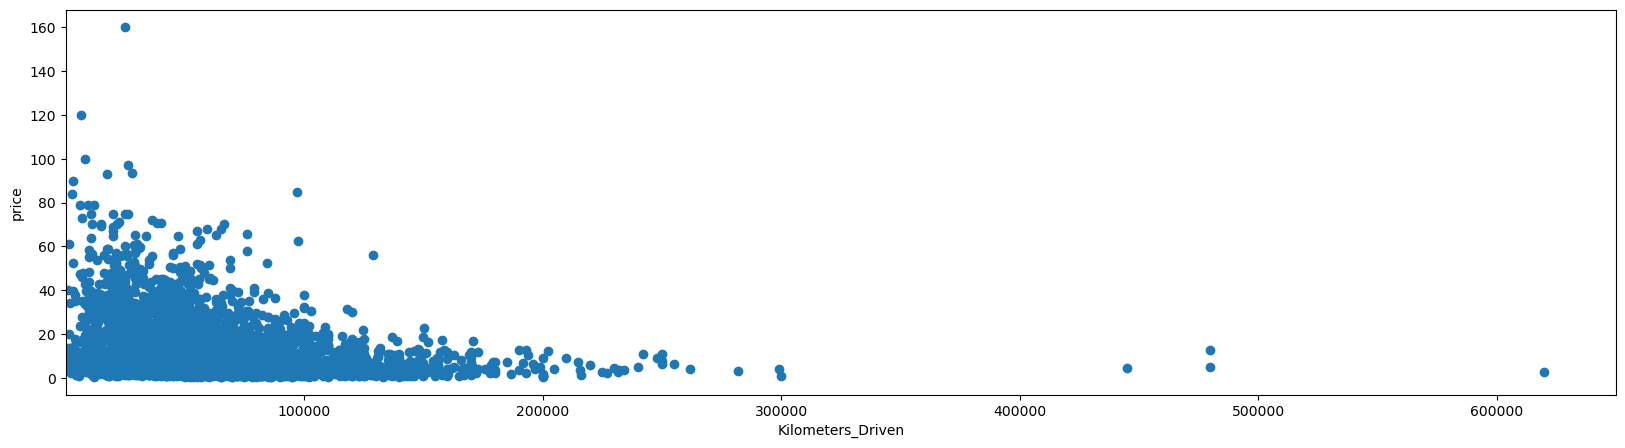

In [52]:
plt.figure(figsize=(20,5))
plt.scatter(x='Kilometers_Driven',y='Price',data=data2)
plt.xlabel("Kilometers_Driven")
plt.ylabel("price")
plt.xlim(160,650000)

#### Step 2 : Group by

In [53]:
df_test = data2[["Name","Seats","Price"]]
df_grp = df_test.groupby(["Name","Seats"],as_index=False).mean()
df_grp

,Name,Seats,Price
0,Ambassador Classic Nova Diesel,5.0,1.350000
1,Audi A3 35 TDI Attraction,5.0,16.500000
2,Audi A3 35 TDI Premium,5.0,19.250000
3,Audi A3 35 TDI Premium Plus,5.0,18.900000
4,Audi A3 35 TDI Technology,5.0,22.500000
...,...,...,...
1849,Volvo XC60 D4 Summum,5.0,18.250000
1850,Volvo XC60 D5,5.0,19.433333
1851,Volvo XC60 D5 Inscription,5.0,17.180000
1852,Volvo XC90 2007-2015 D5 AT AWD,7.0,23.580000


In [54]:
df_grp.loc[df_grp["Price"]==df_grp["Price"].min()]

,Name,Seats,Price
1594,Tata Nano Cx,4.0,0.5


In [55]:
df_grp.loc[df_grp["Price"]==df_grp["Price"].max()]

,Name,Seats,Price
813,Land Rover Range Rover 3.0 Diesel LWB Vogue,5.0,160.0


In [56]:
df_pivot = df_grp.pivot(index="Name",columns="Seats")

In [57]:
df_pivot

Price                                 \
Seats                          0.000000  2.000000  4.000000   5.000000    
Name                                                                      
Ambassador Classic Nova Diesel       NaN       NaN       NaN   1.350000   
Audi A3 35 TDI Attraction            NaN       NaN       NaN  16.500000   
Audi A3 35 TDI Premium               NaN       NaN       NaN  19.250000   
Audi A3 35 TDI Premium Plus          NaN       NaN       NaN  18.900000   
Audi A3 35 TDI Technology            NaN       NaN       NaN  22.500000   
...                                  ...       ...       ...        ...   
Volvo XC60 D4 Summum                 NaN       NaN       NaN  18.250000   
Volvo XC60 D5                        NaN       NaN       NaN  19.433333   
Volvo XC60 D5 Inscription            NaN       NaN       NaN  17.180000   
Volvo XC90 2007-2015 D5 AT AWD       NaN       NaN       NaN        NaN   
Volvo XC90 2007-2015 D5 AWD          NaN       NaN       NaN        NaN   

                                                                        \
Seats                          5.281604  6.000000  7.000000  8.000000    
Name                                                                     
Ambassador Classic Nova Diesel       NaN       NaN       NaN       NaN   
Audi A3 35 TDI Attraction            NaN       NaN       NaN       NaN   
Audi A3 35 TDI Premium               NaN       NaN       NaN       NaN   
Audi A3 35 TDI Premium Plus          NaN       NaN       NaN       NaN   
Audi A3 35 TDI Technology            NaN       NaN       NaN       NaN   
...                                  ...       ...       ...       ...   
Volvo XC60 D4 Summum                 NaN       NaN       NaN       NaN   
Volvo XC60 D5                        NaN       NaN       NaN       NaN   
Volvo XC60 D5 Inscription            NaN       NaN       NaN       NaN   
Volvo XC90 2007-2015 D5 AT AWD       NaN       NaN     23.58       NaN   
Volvo XC90 2007-2015 D5 AWD          NaN       NaN     23.65       NaN   

                                                    
Seats                          9.000000  10.000000  
Name                                                
Ambassador Classic Nova Diesel       NaN       NaN  
Audi A3 35 TDI Attraction            NaN       NaN  
Audi A3 35 TDI Premium               NaN       NaN  
Audi A3 35 TDI Premium Plus          NaN       NaN  
Audi A3 35 TDI Technology            NaN       NaN  
...                                  ...       ...  
Volvo XC60 D4 Summum                 NaN       NaN  
Volvo XC60 D5                        NaN       NaN  
Volvo XC60 D5 Inscription            NaN       NaN  
Volvo XC90 2007-2015 D5 AT AWD       NaN       NaN  
Volvo XC90 2007-2015 D5 AWD          NaN       NaN  

[1847 rows x 10 columns]

In [58]:
df_test1 = data2[["Name","Price","Owner_Type"]]
df_grp1  = df_test1.groupby(["Name","Owner_Type"],as_index=False).mean()
df_grp1


,Name,Owner_Type,Price
0,Ambassador Classic Nova Diesel,3,1.350000
1,Audi A3 35 TDI Attraction,1,16.500000
2,Audi A3 35 TDI Premium,1,19.250000
3,Audi A3 35 TDI Premium Plus,1,18.900000
4,Audi A3 35 TDI Technology,2,22.500000
...,...,...,...
2352,Volvo XC60 D4 Summum,2,18.250000
2353,Volvo XC60 D5,1,19.433333
2354,Volvo XC60 D5 Inscription,1,17.180000
2355,Volvo XC90 2007-2015 D5 AT AWD,1,23.580000


In [59]:
df_pivot1 = df_grp1.pivot(index="Name",columns="Owner_Type")
print(df_pivot1.to_string())

                                                                  Price                          
Owner_Type                                                            1          2        3     4
Name                                                                                             
Ambassador Classic Nova Diesel                                      NaN        NaN    1.350   NaN
Audi A3 35 TDI Attraction                                     16.500000        NaN      NaN   NaN
Audi A3 35 TDI Premium                                        19.250000        NaN      NaN   NaN
Audi A3 35 TDI Premium Plus                                   18.900000        NaN      NaN   NaN
Audi A3 35 TDI Technology                                           NaN  22.500000      NaN   NaN
Audi A4 1.8 TFSI                                               9.000000        NaN      NaN   NaN
Audi A4 1.8 TFSI Technology Edition                           17.500000        NaN      NaN   NaN
Audi A4 2.0 TDI     

#### Step 3 : Co-relation

In [60]:
from scipy import stats as st

In [61]:
pearson_coef, p_value = st.pearsonr(data2['Kilometers_Driven'],data2['Price'])     # Pearson Co-relation

In [62]:
pearson_coef

-0.011535312384799535

In [63]:
p_value

0.373622646301419

#### Step 4 : C0-relation stats

In [64]:
corelation = data2.corr()   # Calculation of co-relation 
corelation

,Year,Kilometers_Driven,Owner_Type,Seats,Diesel,Petrol,Automatic,Manual,Mileage-km/li,Power-bhp,Engine-CC,Price
Year,1.000000,-0.172610,-0.397224,0.012182,0.128111,-0.128111,0.098019,-0.098019,0.326876,0.085546,-0.030173,0.306567
Kilometers_Driven,-0.172610,1.000000,0.084943,0.083296,0.104774,-0.104774,-0.025872,0.025872,-0.066328,0.022611,0.087724,-0.011535
Owner_Type,-0.397224,0.084943,1.000000,0.015173,-0.045816,0.045816,-0.008489,0.008489,-0.162942,-0.007231,0.039362,-0.097649
Seats,0.012182,0.083296,0.015173,1.000000,0.306813,-0.306813,-0.077698,0.077698,-0.301300,0.104193,0.383764,0.049910
Diesel,0.128111,0.104774,-0.045816,0.306813,1.000000,-1.000000,0.135937,-0.135937,0.133195,0.283973,0.421952,0.316903
Petrol,-0.128111,-0.104774,0.045816,-0.306813,-1.000000,1.000000,-0.135937,0.135937,-0.133195,-0.283973,-0.421952,-0.316903
Automatic,0.098019,-0.025872,-0.008489,-0.077698,0.135937,-0.135937,1.000000,-1.000000,-0.331125,0.625369,0.489197,0.584598
Manual,-0.098019,0.025872,0.008489,0.077698,-0.135937,0.135937,-1.000000,1.000000,0.331125,-0.625369,-0.489197,-0.584598
Mileage-km/li,0.326876,-0.066328,-0.162942,-0.301300,0.133195,-0.133195,-0.331125,0.331125,1.000000,-0.418030,-0.550861,-0.304747
Power-bhp,0.085546,0.022611,-0.007231,0.104193,0.283973,-0.283973,0.625369,-0.625369,-0.418030,1.000000,0.843656,0.751363


<AxesSubplot:>

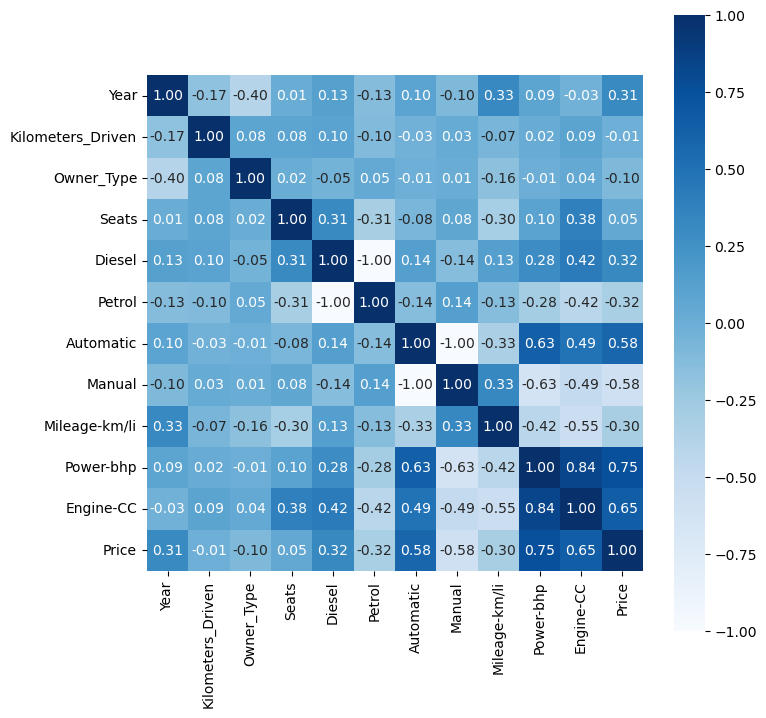

In [65]:
# plotting of heatmap

plt.figure(figsize=(8,8))
sns.heatmap(corelation, cmap='Blues', square=True, cbar=True,fmt='.2f',annot=True, annot_kws={'size':10})

<h2 align='left' style="color: #8758FF;">MODEL BUILDING</h2> <br>

<h4>STEPS</h4>
<ol>
  <li>
      <b><em>Import Libraries and Split data</em></b>
  </li>
   <br> 
  <li>
     <b><em>Build Regression models</em></b>
      <ol>
          <li>Linear Regressor</li>
          <li>Ridge Regressor</li>
          <li>Lasso Regressor</li>
          <li>XGboost Regressor</li>
      </ol>
  </li>
 <br> 
  <li>
    <b><em>Fit data and make Predictions</em></b>
  </li>
 <br>    
   <li>
    <b><em>Model Evaluation</em></b>
  </li>
  
</ol>


#### Step 1: Import Libraries and Split data

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [67]:
x = data2.drop(["Name","Location","Price"],axis=1)
y = data2["Price"]

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.5,test_size=0.5,random_state=5)

In [69]:
x_train

,Year,Kilometers_Driven,Owner_Type,Seats,Diesel,Petrol,Automatic,Manual,Mileage-km/li,Power-bhp,Engine-CC
2358,2017,40000,1,5.0,1,0,0,1,24.30,88.50,1248.0
3036,2015,66510,1,5.0,0,1,0,1,21.10,55.20,814.0
4627,2011,28619,1,5.0,0,1,0,1,19.70,46.30,796.0
4976,2006,44000,1,5.0,0,1,0,1,17.70,78.00,1497.0
555,2009,48000,1,5.0,1,0,1,0,17.00,105.00,1896.0
...,...,...,...,...,...,...,...,...,...,...,...
3046,2012,77216,2,5.0,1,0,0,1,17.50,106.00,1896.0
1725,2013,58000,1,4.0,1,0,1,0,11.20,306.00,2993.0
4079,2014,64637,1,5.0,1,0,0,1,22.77,98.59,1498.0
2254,2013,45306,2,4.0,1,0,1,0,11.20,241.00,2993.0


In [70]:
y_train

2358     7.85
3036     2.95
4627     2.40
4976     1.55
555      5.00
        ...  
3046     4.50
1725    48.00
4079     7.52
2254    42.50
2915     1.40
Name: Price, Length: 2975, dtype: float64

#### Step 2 : ML models

In [71]:
linreg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
xgb = XGBRegressor()

#### Step 3 and 4 : For each model fit data, make predictions and evalute each model

### Linear Regressor

In [72]:
linreg.fit(x_train,y_train)

linreg_predict = linreg.predict(x_train)

print("Predictions made on traning data :",linreg_predict )

error_score_r2 = r2_score(y_train,linreg_predict)
print("R2 score on trainig data :",error_score_r2)


mean_err = mean_squared_error(y_train,linreg_predict)
print("MSE on traning data :",mean_err)
 

mean_absloute = mean_absolute_error(y_train,linreg_predict)
print("Mean Absolute error on traning data",mean_absloute)



Predictions made on traning data : [ 9.23166783  0.49374445 -2.29687945 ...  7.76920242 32.33333434
  3.36248656]
R2 score on trainig data : 0.6857014175954963
MSE on traning data : 37.258942754964494
Mean Absolute error on traning data 3.8503609476697322


D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

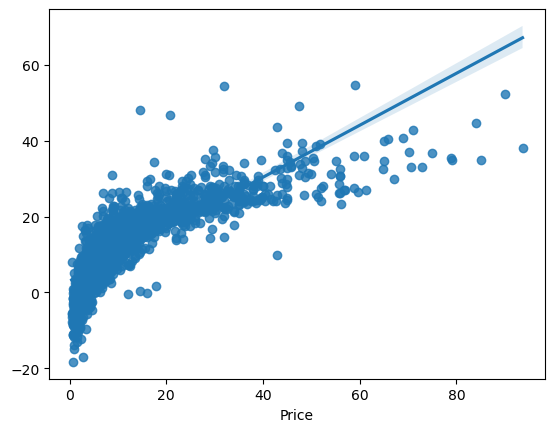

In [73]:
sns.regplot(y_train,linreg_predict)                                 # Regression plot

<AxesSubplot:xlabel='Price'>

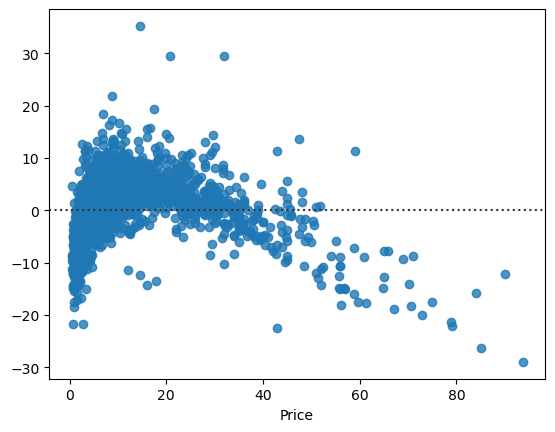

In [74]:
sns.residplot(y_train,linreg_predict)                            # Resdiual plot

D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


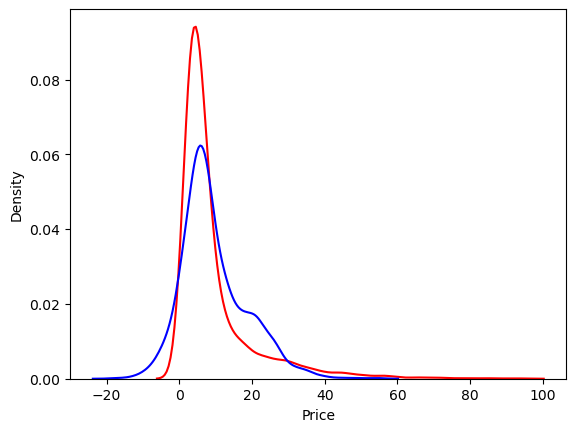

In [75]:
ax1 = sns.distplot(y_train,color='red',label="Actual",hist=False)
sns.distplot(linreg_predict,color='blue',label="Predicted",hist=False) 
plt.show()                                                                                    # Distribution plot

### Ridge Regression

In [76]:
ridge.fit(x_train,y_train)

rig_pred = ridge.predict(x_train)
print("Predictions made on traning data :",rig_pred )


error_r2_ridge = r2_score(y_train,rig_pred)
print("R2 score on trainig data :",error_r2_ridge)


mean_sq_ridge = mean_squared_error(y_train,rig_pred)
print("MSE on traning data :",mean_sq_ridge)


mean_ab_ridge = mean_absolute_error(y_train,rig_pred)
print("Mean Absolute error on traning data",mean_ab_ridge)



Predictions made on traning data : [ 9.23078481  0.4955481  -2.29579149 ...  7.76880307 32.32966321
  3.36011694]
R2 score on trainig data : 0.6857013661245206
MSE on traning data : 37.258948856659664
Mean Absolute error on traning data 3.8502213671882717


D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

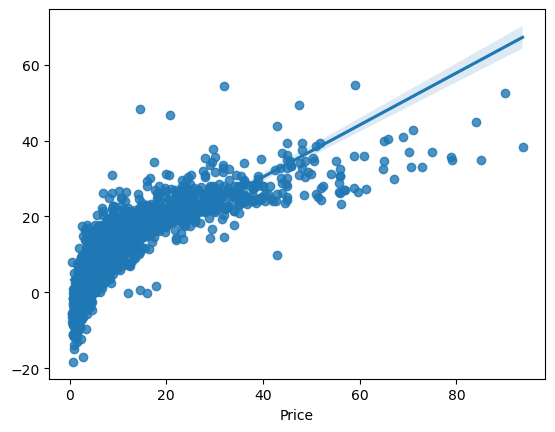

In [77]:
sns.regplot(y_train,rig_pred)

<AxesSubplot:xlabel='Price'>

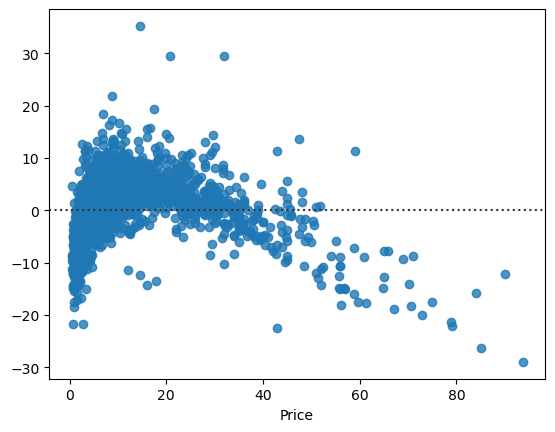

In [78]:
sns.residplot(y_train,linreg_predict) 

D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

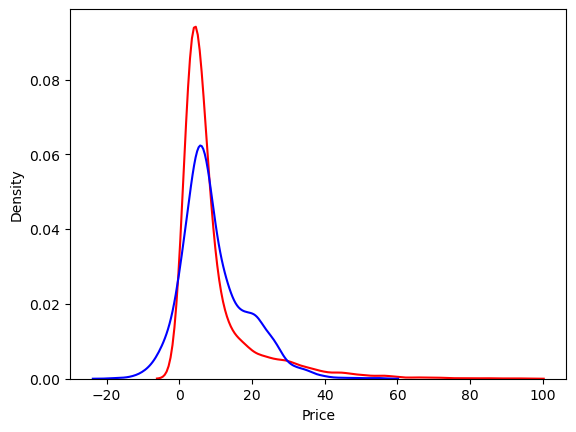

In [79]:
ax2 = sns.distplot(y_train,color='red',label="Actual",hist=False)
sns.distplot(rig_pred,color='blue',label="Predicted",hist=False)

### Lasso regression

In [80]:
lasso.fit(x_train,y_train)

lasso_pred = lasso.predict(x_train)
print("Predictions made on traning data :",lasso_pred)

lasso_r2 = r2_score(y_train,lasso_pred)
print("R2 score on trainig data :",lasso_r2)

lasso_mse = mean_squared_error(y_train,lasso_pred)
print("MSE on traning data :",lasso_mse)

lasso_mae = mean_absolute_error(y_train,lasso_pred)
print("Mean Absolute error on traning data",lasso_mae)





Predictions made on traning data : [ 8.59018387  1.65985408 -1.06588644 ...  7.64214219 28.69042304
  1.54365254]
R2 score on trainig data : 0.6424198742448227
MSE on traning data : 42.38981077769648
Mean Absolute error on traning data 4.025120926515003


D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

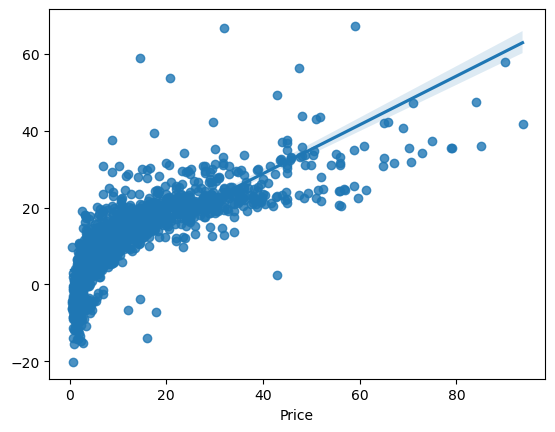

In [81]:
sns.regplot(y_train,lasso_pred)

<AxesSubplot:xlabel='Price'>

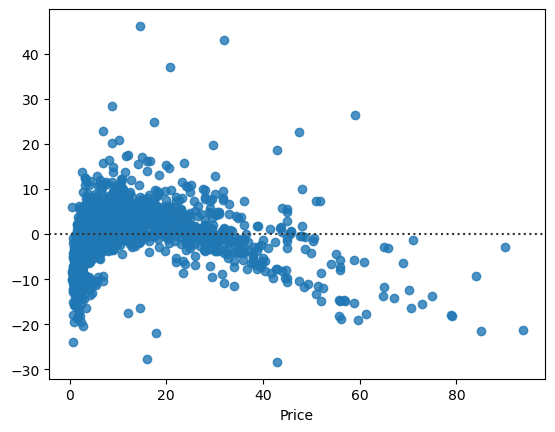

In [82]:
sns.residplot(y_train,lasso_pred) 

D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

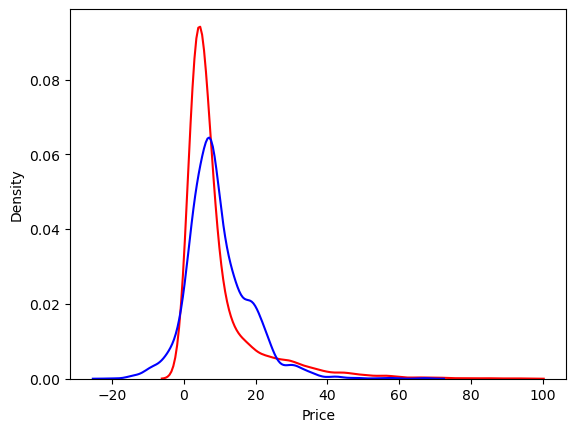

In [83]:
ax3 = sns.distplot(y_train,color='red',label="Actual",hist=False)
sns.distplot(lasso_pred,color='blue',label="Predicted",hist=False)

### XGB Regressor

D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Predictions made on traning data : [ 8.689212   3.0104496  2.0566845 ...  6.076047  41.63214    2.370351 ]
R2 score on trainig data : 0.99519298848751
MSE on traning data : 0.5698535621640567
Mean Absolute error on traning data 0.5159462029332874


D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

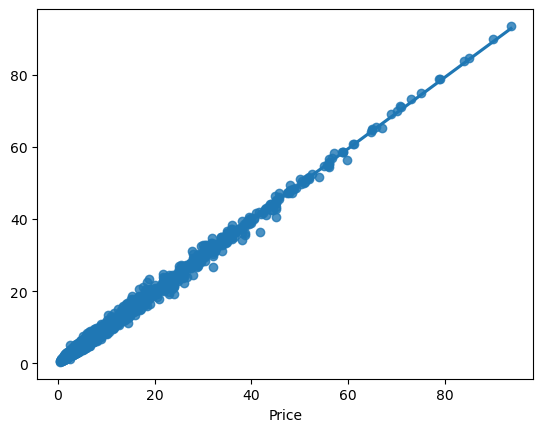

In [84]:
xgb.fit(x_train,y_train)

xgb_pred = xgb.predict(x_train)
print("Predictions made on traning data :",xgb_pred)

xgb_r2 = r2_score(y_train,xgb_pred)
print("R2 score on trainig data :",xgb_r2)

xgb_mse = mean_squared_error(y_train,xgb_pred)
print("MSE on traning data :",xgb_mse)

xgb_mae = mean_absolute_error(y_train,xgb_pred)
print("Mean Absolute error on traning data",xgb_mae)

sns.regplot(y_train,xgb_pred)

D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

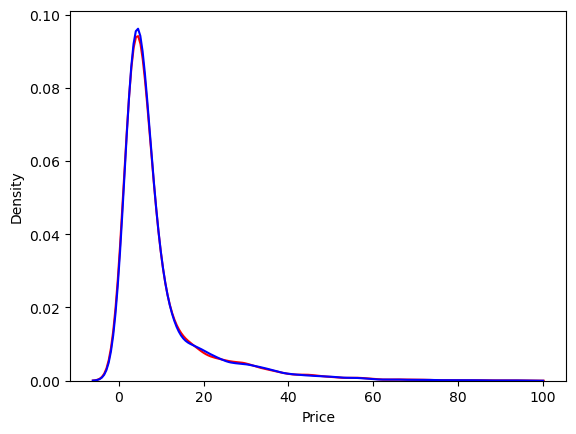

In [85]:
ax4 = sns.distplot(y_train,color='red',label="Actual",hist=False)
sns.distplot(xgb_pred,color='blue',label="Predicted",hist=False)

In [86]:
xgb_test_prd = xgb.predict(x_test)
print("Predictions on testing data")
xgb_test_prd

Predictions on testing data


array([ 8.230324 , 12.699884 ,  5.489438 , ..., 26.008797 ,  1.7981862,
        7.663256 ], dtype=float32)

D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

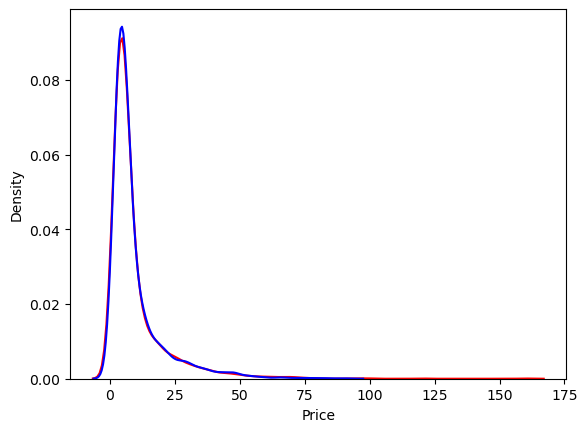

In [87]:
ax4 = sns.distplot(y_test,color='red',label="Actual",hist=False)
sns.distplot(xgb_test_prd,color='blue',label="Predicted",hist=False)

D:\Softwares\Anaconda\envs\CarPricePrediction_ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

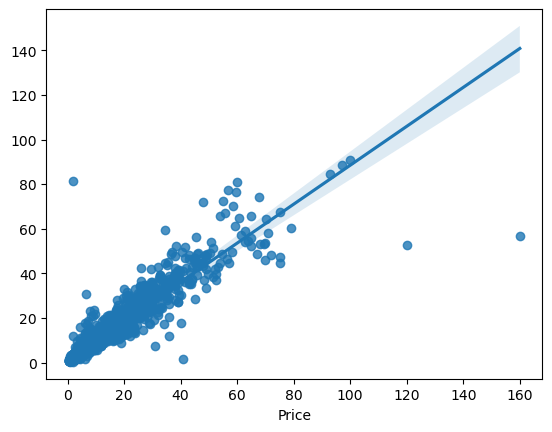

In [88]:
sns.regplot(y_test,xgb_test_prd)

<AxesSubplot:xlabel='Price'>

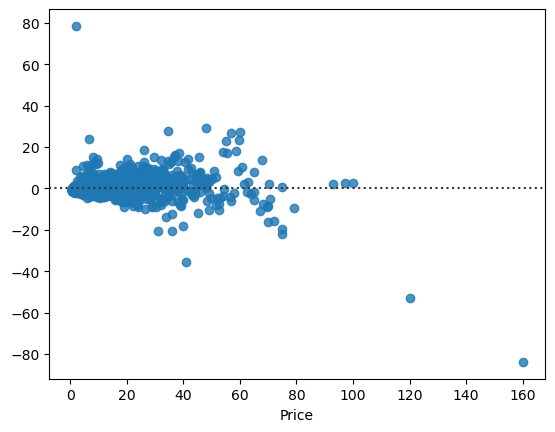

In [89]:
sns.residplot(y_test,xgb_test_prd) 

<h2 align='left' style="color: #8758FF;">BUILDING PREDICTIVE SYSTEM</h2> <br>

In [90]:
input_data = (2012,87000,1,7,1,0,0,1,20.77,88.76,1248)
 
input_data_nparr = np.asarray(input_data)

input_data_reshaped = input_data_nparr.reshape(1,-1)

print(input_data_reshaped)

Price_prediction = xgb.predict(input_data_reshaped)

print(Price_prediction)

[[2.012e+03 8.700e+04 1.000e+00 7.000e+00 1.000e+00 0.000e+00 0.000e+00
  1.000e+00 2.077e+01 8.876e+01 1.248e+03]]
[5.4264517]


<h2 align='left' style="color: #8758FF;">SAVING MODEL</h2> <br>

In [91]:
import pickle

In [92]:
filename = "CarPricePrediction_Model.sav"
pickle.dump(xgb, open(filename,'wb'))

In [93]:
loaded_model = pickle.load(open('CarPricePrediction_Model.sav','rb'))

In [94]:
input_data = (2012,87000,1,7,1,0,0,1,20.77,88.76,1248)
 
input_data_nparr = np.asarray(input_data)

input_data_reshaped = input_data_nparr.reshape(1,-1)

print(input_data_reshaped)

Price_prediction = loaded_model.predict(input_data_reshaped)

print(Price_prediction)

[[2.012e+03 8.700e+04 1.000e+00 7.000e+00 1.000e+00 0.000e+00 0.000e+00
  1.000e+00 2.077e+01 8.876e+01 1.248e+03]]
[5.4264517]
